In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import os
from os.path import join as pjoin


from esn_lib.esn import *
from esn_lib.hubesn import *

## Plot eigenvalue

In [2]:
SAVEPATH = '../plots/eigenvalues'
EXPTPATH = '../results/eigenvalues'
PLTPATH = '../plots/eigenvalues'

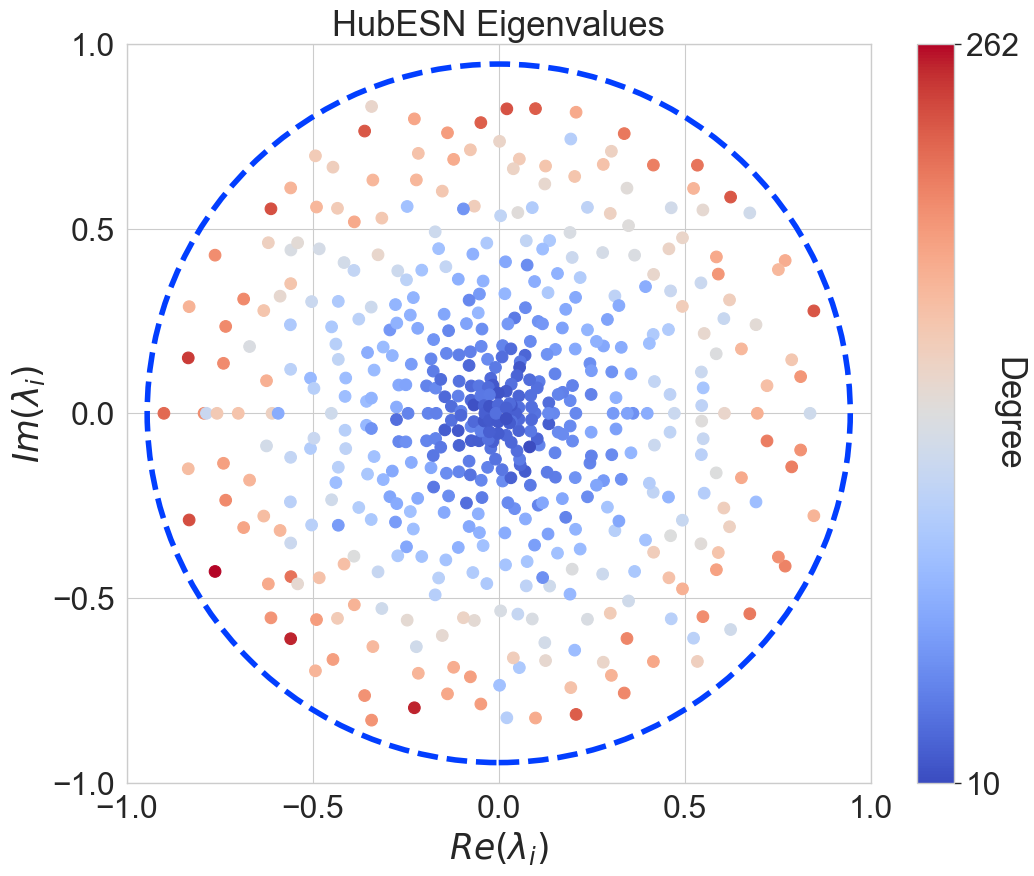

In [3]:
params = {
    'n_size': 500,
    'p2': 0.2,
    'lambda_dc': 0.5,
    'lambda_sc': 0.5,
    'spec_rad': 0.9,
}

hubesn = HubESN(**params)
deg = np.count_nonzero(hubesn.W_rc, axis=0)
deg_reg = deg / np.max(deg)
# deg = np.abs(hubesn.get_eigen_centralities())
# deg = (deg - np.min(deg)) / (np.max(deg) - np.min(deg))

w, v = np.linalg.eig(hubesn.W_rc)
x = [ele.real for ele in w]
# extract imaginary part
y = [ele.imag for ele in w]

sns.set_color_codes("bright")
colors = sns.color_palette("Paired")
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2.6)

# plot the complex numbers
plt.figure(figsize=(12, 9.6))
plt.tight_layout()
plt.scatter(x, y, c=deg_reg, cmap='coolwarm', s=70)
plt.xticks(np.arange(-1, 1.1, 0.5))
plt.yticks(np.arange(-1, 1.1, 0.5))
# plot a dashed circle
rad = np.max(np.concatenate((np.abs(x), np.abs(y)))) * 1.05
circle = plt.Circle((0, 0), rad, color='b', fill=False, ls='--', lw=4)
plt.gca().add_patch(circle)

# add a text on colorbar, use deg as label instead of deg_reg
cbar = plt.colorbar(ticks = [0, 1])
cbar.set_label('Degree', rotation=270)
cbar.ax.set_yticks([deg_reg.min(), deg_reg.max()])
cbar.ax.set_yticklabels([deg.min(), deg.max()])

plt.ylabel(f'$Im(\lambda_i)$')
plt.xlabel(f'$Re(\lambda_i)$')
plt.title('HubESN Eigenvalues')
plt.savefig(pjoin(PLTPATH, 'hubesn_eigenvalues.jpg'), dpi=300)

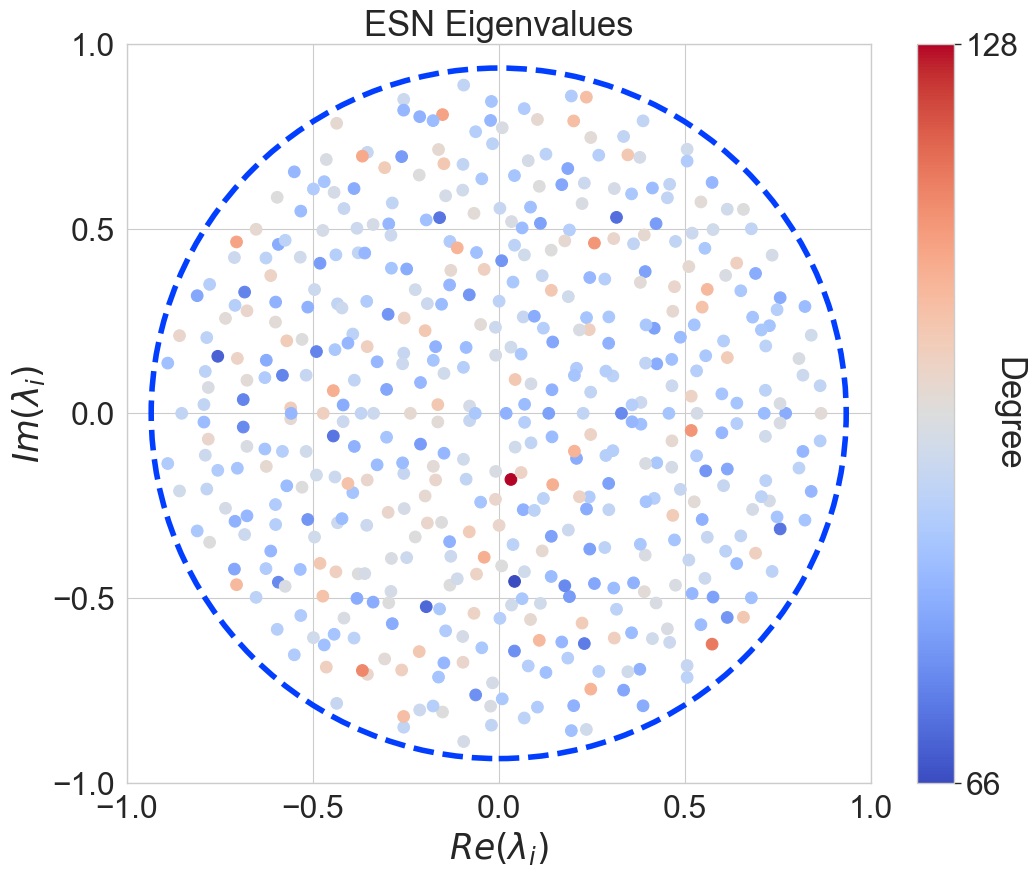

In [5]:
esn = ESN(**params)
deg = np.count_nonzero(esn.W_rc, axis=0)
deg_reg = deg / np.max(deg)
# deg = np.abs(esn.get_eigen_centralities())
# deg = (deg - np.min(deg)) / (np.max(deg) - np.min(deg))

w, v = np.linalg.eig(esn.W_rc)
x = [ele.real for ele in w]
# extract imaginary part
y = [ele.imag for ele in w]

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2.6)
# plot the complex numbers
plt.figure(figsize=(12, 9.6))
plt.tight_layout()
plt.scatter(x, y, c=deg_reg, cmap='coolwarm', s=70)
plt.xticks(np.arange(-1, 1.1, 0.5))
plt.yticks(np.arange(-1, 1.1, 0.5))
# plot a dashed circle
rad = np.max(np.concatenate((np.abs(x), np.abs(y)))) * 1.05
circle = plt.Circle((0, 0), rad, color='b', fill=False, ls='--', lw=4)
plt.gca().add_patch(circle)


# add a text on colorbar, use deg as label instead of deg_reg
cbar = plt.colorbar(ticks = [0, 1])
cbar.set_label('Degree', rotation=270)
cbar.ax.set_yticks([deg_reg.min(), deg_reg.max()])
cbar.ax.set_yticklabels([deg.min(), deg.max()])

plt.ylabel(f'$Im(\lambda_i)$')
plt.xlabel(f'$Re(\lambda_i)$')
plt.title('ESN Eigenvalues')
plt.savefig(pjoin(PLTPATH, 'esn_eigenvalues.jpg'), dpi=300)

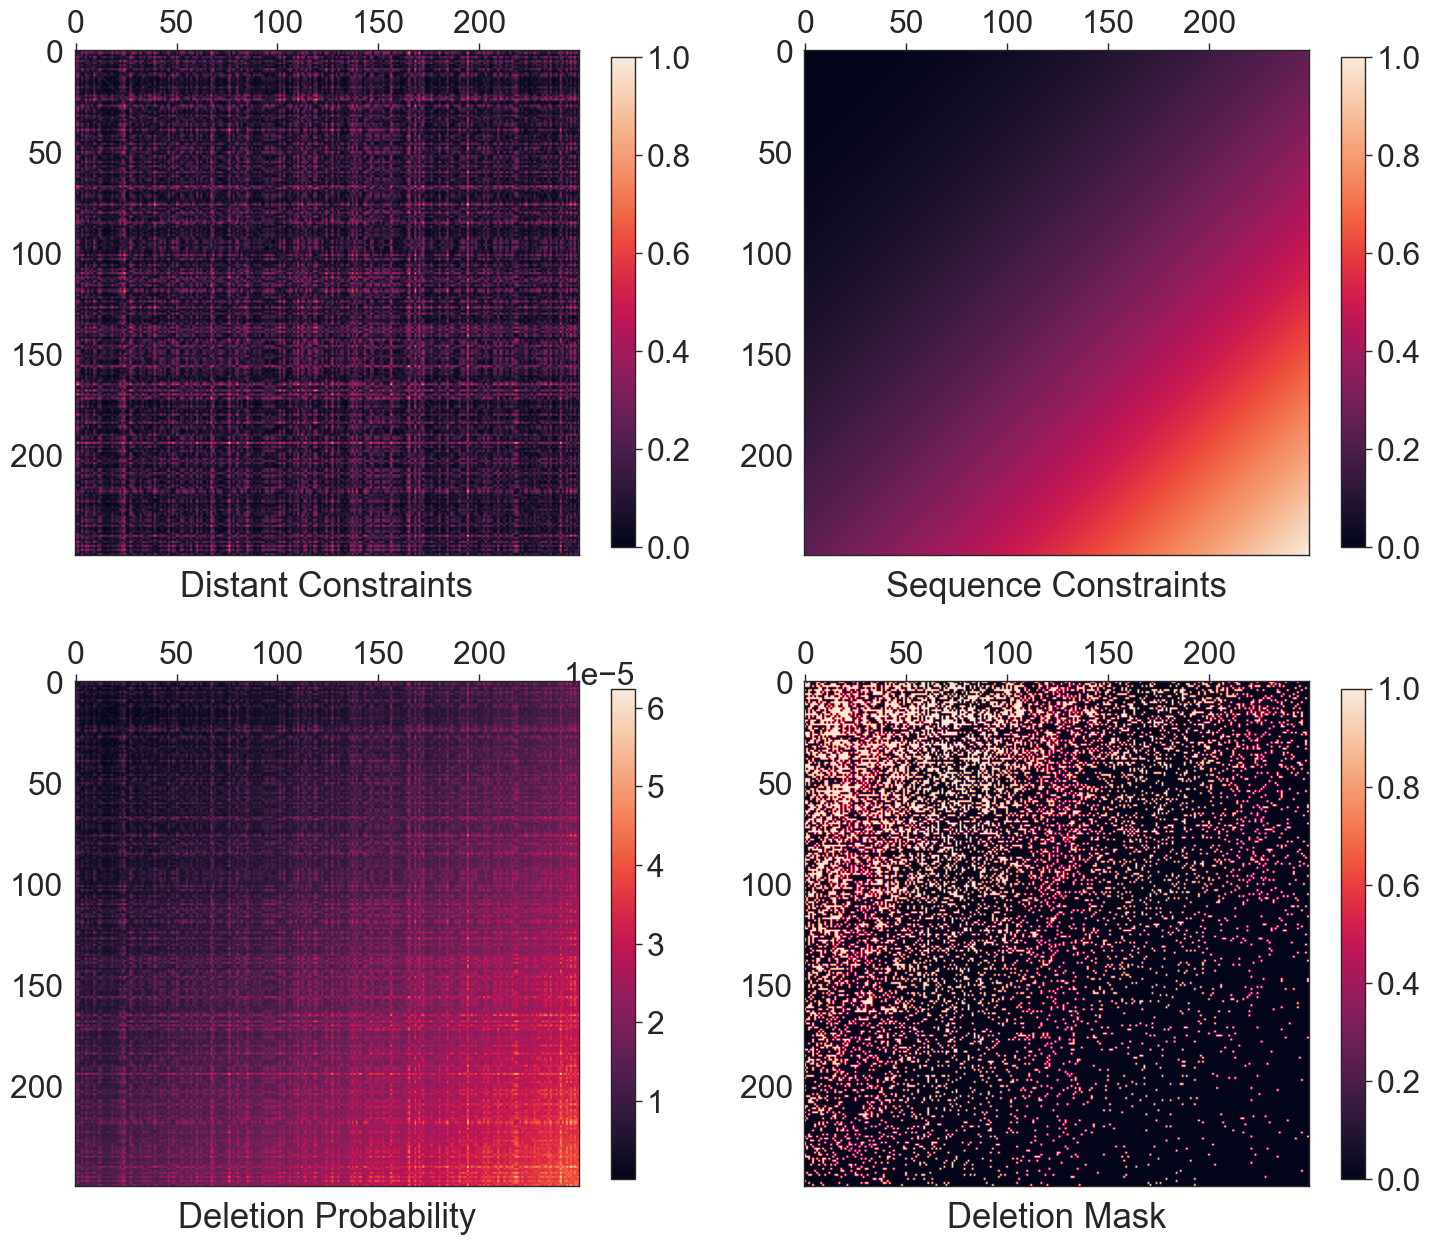

<Figure size 640x480 with 0 Axes>

In [13]:
params = {
    'n_size': 250,
    'p2': 0.2,
    'lambda_dc': 0.5,
    'lambda_sc': 0.5,
    'spec_rad': 0.9,
    'exp_coef': 2
}
hubesn = HubESN(**params)

sk = 0.9
sns.set_style('white')
sns.set_context('paper', font_scale=2.6)

fig, axs = plt.subplots(2, 2, figsize=(15, 13))
fig.colorbar(axs[0, 0].imshow(hubesn.dc), ax=axs[0, 0], cmap='gist_heat', shrink=sk)
fig.colorbar(axs[0, 1].imshow(hubesn.sc), ax=axs[0, 1], cmap='gist_heat', shrink=sk)
fig.colorbar(axs[1, 0].imshow(hubesn.W_prob), ax=axs[1, 0], cmap='gist_heat', shrink=sk)
fig.colorbar(axs[1, 1].imshow(hubesn.W_rc_mask), ax=axs[1, 1], cmap='gist_heat', shrink=sk)
axs[0, 0].set_title("Distant Constraints", y=-0.1)
axs[0, 1].set_title("Sequence Constraints", y=-0.1)
axs[1, 0].set_title("Deletion Probability", y=-0.1)
axs[1, 1].set_title("Deletion Mask", y=-0.1)
# put x axis to the top
for ax in axs.flat:
    ax.label_outer()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    # put title to the bottom
plt.tight_layout()
plt.show()
plt.savefig(pjoin(PLTPATH, 'hubesn_matrices.jpg'), dpi=300)

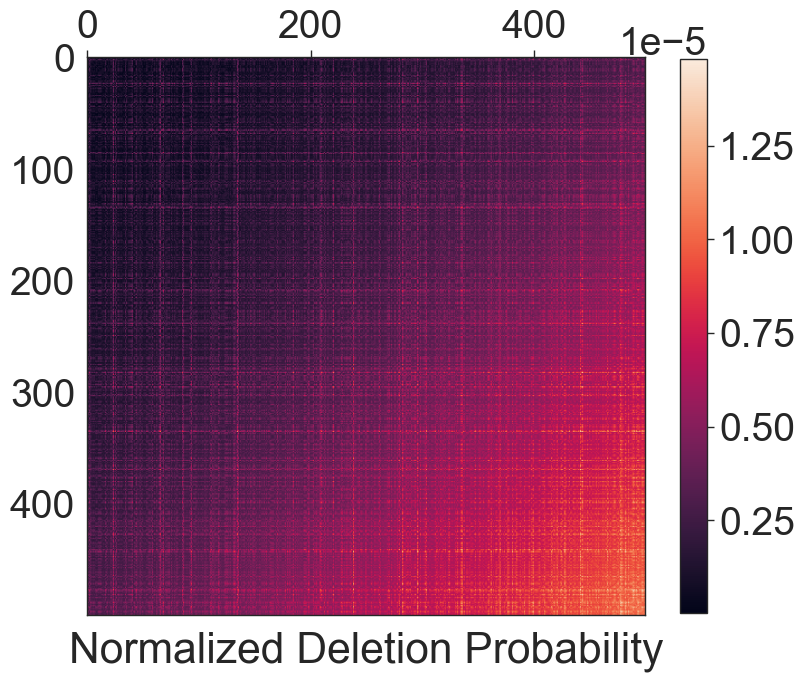

NameError: name 'PLTPATH' is not defined

In [3]:
params = {
    'n_size': 500,
    'p2': 0.2,
    'lambda_dc': 0.5,
    'lambda_sc': 0.5,
    'spec_rad': 0.9,
    'exp_coef': 2
}
hubesn = HubESN(**params)

sk = 0.9
sns.set_style('white')
sns.set_context('paper', font_scale=3.2)

fig, ax = plt.subplots(figsize=(9, 8))
plt.colorbar(ax.imshow(hubesn.W_prob), ax=ax, cmap='gist_heat', shrink=sk)
ax.set_title("Normalized Deletion Probability", y=-0.1)
ax.label_outer()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
# plt.tight_layout()
plt.show()
plt.savefig(pjoin(PLTPATH, 'hubesn_matrices.jpg'), dpi=300)

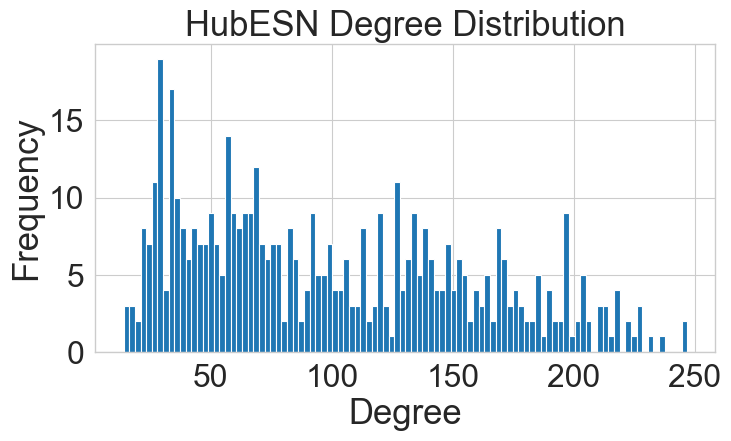

In [22]:
w = hubesn.W_rc_mask
deg = np.count_nonzero(w, axis=0)
plt.figure(figsize=(8, 4))
plt.tight_layout()
plt.hist(deg, bins=100)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('HubESN Degree Distribution')
plt.savefig(pjoin(PLTPATH, 'hubesn_degree_distribution.jpg'), dpi=300)